In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (ConfusionMatrixDisplay, RocCurveDisplay,
                             PrecisionRecallDisplay, classification_report)

In [ ]:
# LEER ARCHIVO
df = pd.read_csv("diabetes.csv")
# IDENTIFICAR COLUMNA OBJETIVO
y = df["Outcome"]         # columna objetivo (0/1)
# ELIMINAR COLUMNA OBJETIVO
X = df.drop(columns=["Outcome"])
# MOSTRAR LA SEPARACION
y,X

(0      1
 1      0
 2      1
 3      0
 4      1
       ..
 763    0
 764    0
 765    0
 766    1
 767    0
 Name: Outcome, Length: 768, dtype: int64,
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1     

In [ ]:
# OTRA FORMA DE OBTENER VARIABLES OBJETIVOS
# X=diabetes.iloc[:,0:8].values
# y=diabetes.iloc[:,-1].values

In [ ]:
# VARIABLE DUMMIES

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = make_column_transformer((OneHotEncoder(), [3]), remainder = "passthrough")
X = onehotencoder.fit_transform(X)

# BORRAR POR ESTRATEGIA LA PRIMERA DE LAS DUMMIES
X = X[:, 1:]

InvalidIndexError: (slice(None, None, None), 3)

In [ ]:
# ESCALADO DE VARIABLES

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
# DIVIDIR LA DATA
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
# test size es tamano 25 / 75 propocion de datos
# DEPENDE DEL TAMANIO +10000 10 a 20, =100 20 a 30, -200 30 a 40
# stratify MANTIENE LA MISMA PROPORCIONA DEL CORTE
# shuffle TRUE MEZCLA LOS DATOS ANTES DE DIVIDIR

In [ ]:
y_train

,Outcome
332,1
111,1
64,1
742,0
101,0
...,...
735,0
475,0
46,0
767,0


In [ ]:
# ARMAR ARBOLITO
tree = DecisionTreeClassifier()
# parametros
# criterion="gini",    # "entropy" o "log_loss" también
# max_depth=4,         # ajusta para controlar complejidad
# random_state=42

In [ ]:
# ENTRENAMOS
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# PROBAMOS
y_pred = tree.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7291666666666666

In [ ]:
# PARAMETROS DEL ARBOL
param_dist={
    "criterion":["gini","entropy", "log_loss"], # "entropy" o "log_loss" también
    "max_depth":[1,2,3,4,5,6,7,8,9,None], # ajusta para controlar complejidad
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(tree,param_grid=param_dist,cv=15,n_jobs=-1)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]})

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [ ]:
grid.best_score_

np.float64(0.749932523616734)

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [89]:
# PROBAMOS CON EL RESULTADO
# ARMAR ARBOLITO
tree = DecisionTreeClassifier(
    criterion="gini",    # "entropy" o "log_loss" también
    max_depth=8,         # ajusta para controlar complejidad
    random_state=42
)
# parametros
# criterion="gini",    # "entropy" o "log_loss" también
# max_depth=4,         # ajusta para controlar complejidad
# random_state=42
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.8020833333333334

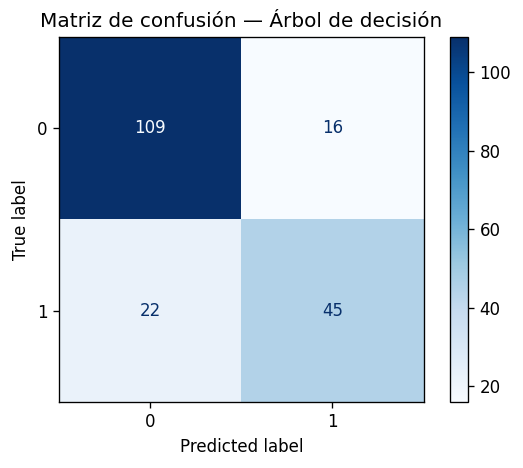

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       125
           1       0.74      0.67      0.70        67

    accuracy                           0.80       192
   macro avg       0.78      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192



In [90]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,4), dpi=120)
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test, ax=ax, cmap="Blues")
ax.set_title("Matriz de confusión — Árbol de decisión")
plt.tight_layout()
plt.show()

print(classification_report(y_test, tree.predict(X_test)))

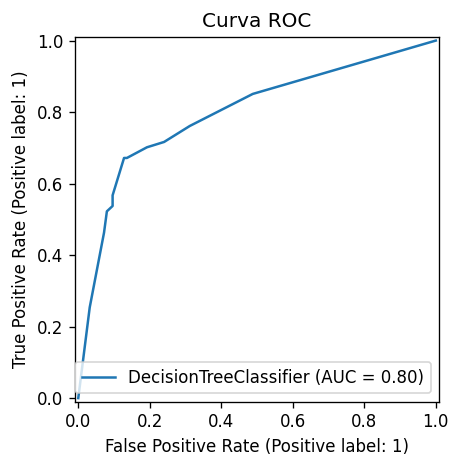

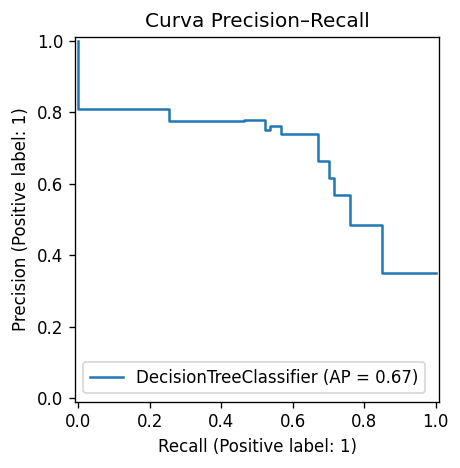

In [91]:
fig, ax = plt.subplots(figsize=(5,4), dpi=120)
RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=ax)
ax.set_title("Curva ROC")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(5,4), dpi=120)
PrecisionRecallDisplay.from_estimator(tree, X_test, y_test, ax=ax)
ax.set_title("Curva Precision–Recall")
plt.tight_layout()
plt.show()

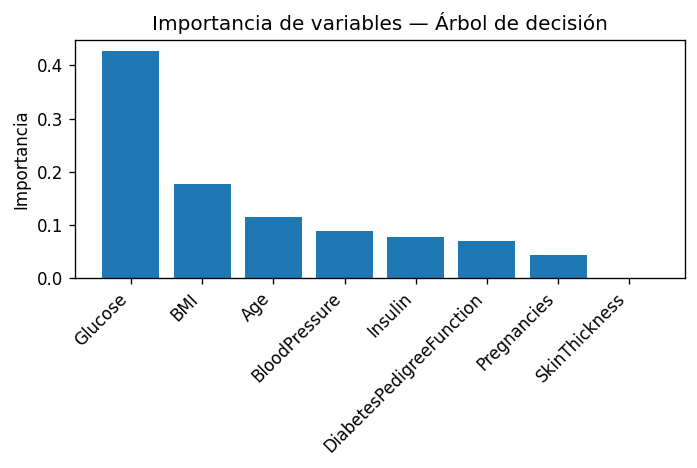

In [92]:
importances = tree.feature_importances_
feat_names = np.array(X.columns)

order = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(6,4), dpi=120)
ax.bar(range(len(importances)), importances[order])
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(feat_names[order], rotation=45, ha="right")
ax.set_ylabel("Importancia")
ax.set_title("Importancia de variables — Árbol de decisión")
plt.tight_layout()
plt.show()

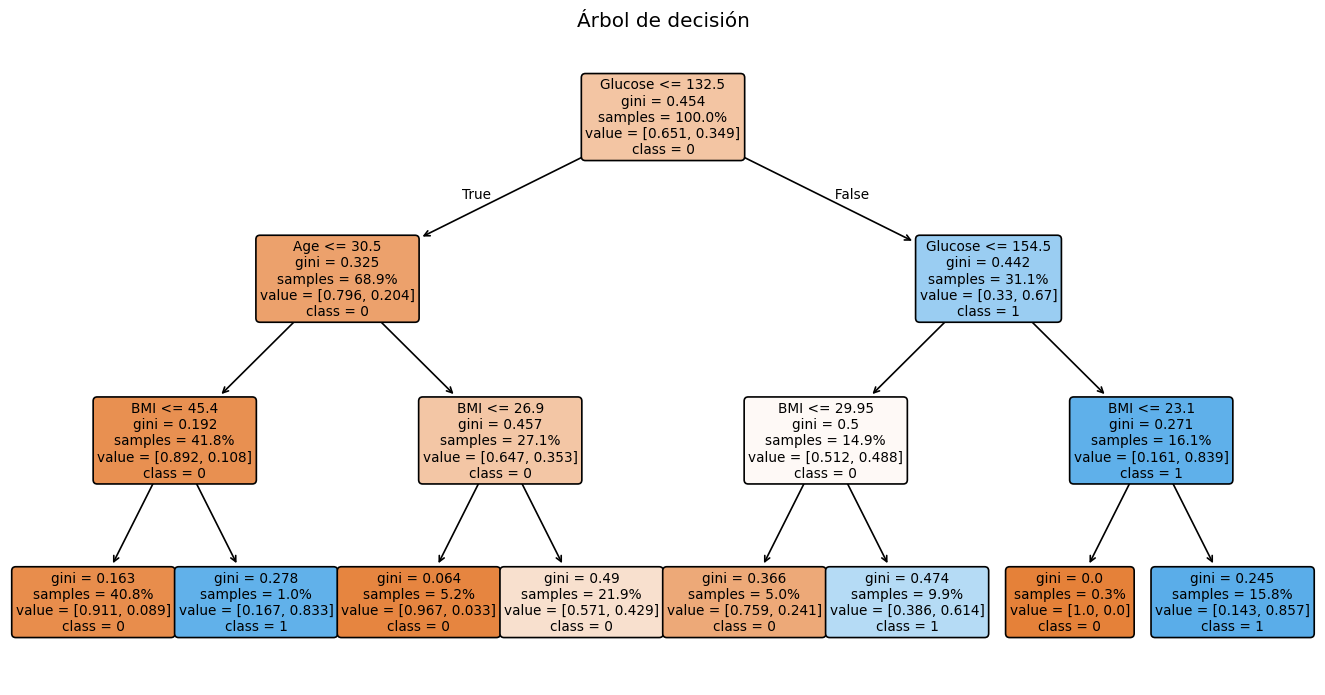

In [ ]:
from sklearn import tree as sktree
fig, ax = plt.subplots(figsize=(14, 7), dpi=120)

sktree.plot_tree(
    tree,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    filled=True,
    rounded=True,
    impurity=True,        # muestra gini/entropy/log_loss del nodo
    proportion=True       # distribuciones normalizadas
)
ax.set_title("Árbol de decisión")
plt.show()

In [ ]:
# En Colab:
!apt-get -qq install graphviz
!pip -q install graphviz pydotplus

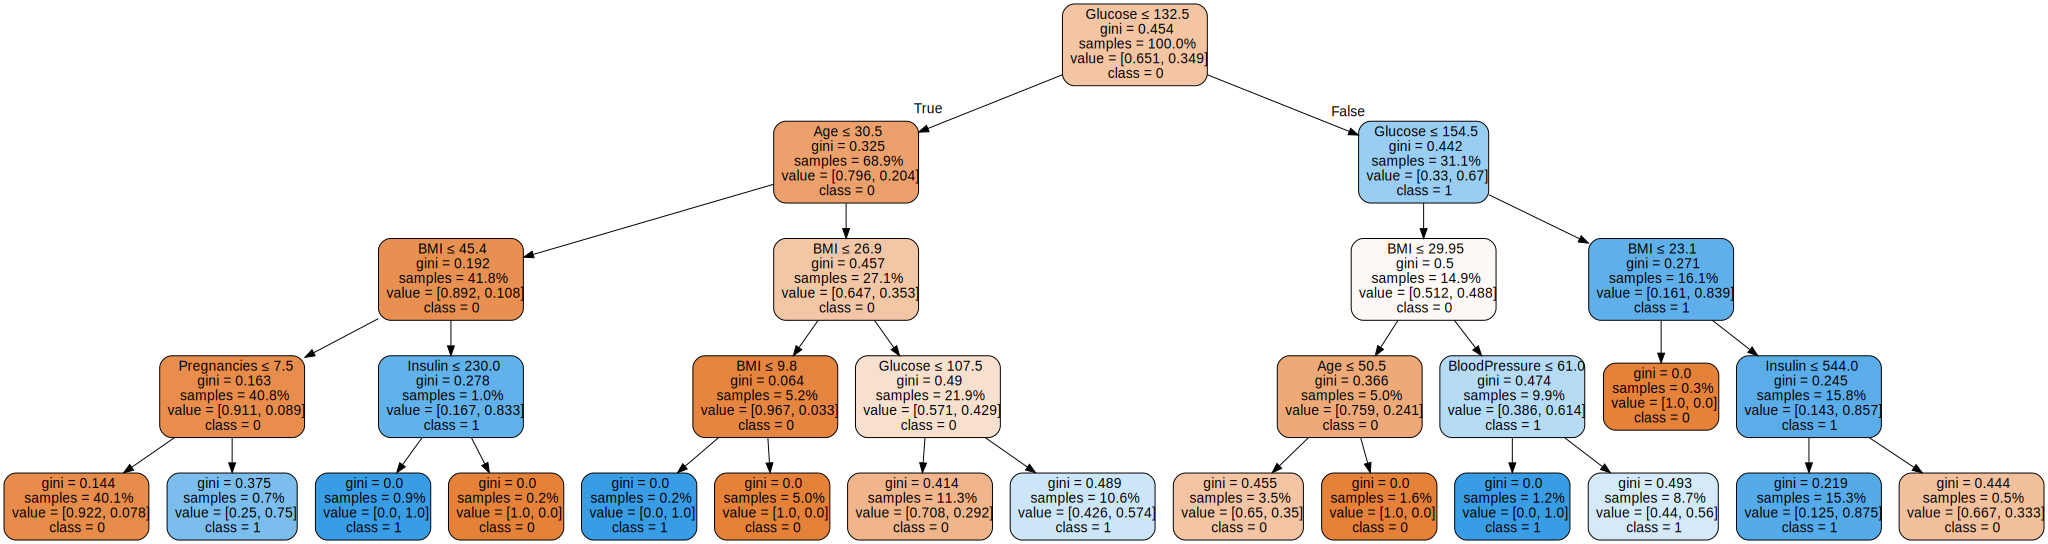

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot = export_graphviz(
    tree,
    out_file=None,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    filled=True,
    rounded=True,
    special_characters=True,
    impurity=True,
    proportion=True
)
graph = graphviz.Source(dot)
graph.format = "png"          # "svg" también es buena opción
graph.render("arbol_decision", cleanup=True)
graph

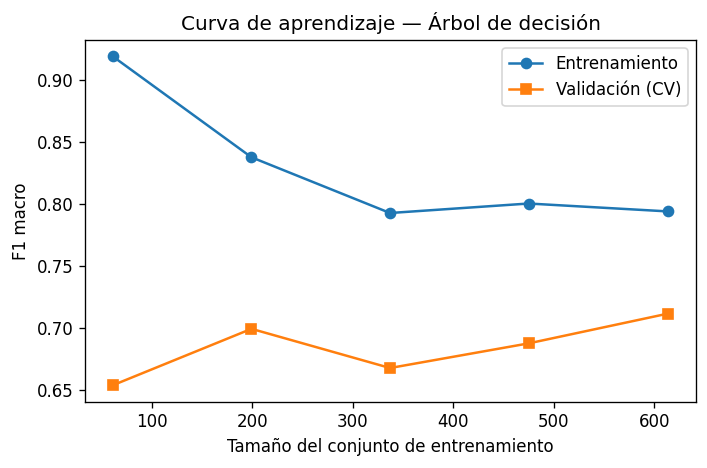

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    estimator=DecisionTreeClassifier(max_depth=4, random_state=42),
    X=X, y=y, cv=5, scoring="f1_macro", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), shuffle=True, random_state=42
)

train_mean = train_scores.mean(axis=1)
valid_mean = valid_scores.mean(axis=1)

fig, ax = plt.subplots(figsize=(6,4), dpi=120)
ax.plot(train_sizes, train_mean, marker="o", label="Entrenamiento")
ax.plot(train_sizes, valid_mean, marker="s", label="Validación (CV)")
ax.set_xlabel("Tamaño del conjunto de entrenamiento")
ax.set_ylabel("F1 macro")
ax.set_title("Curva de aprendizaje — Árbol de decisión")
ax.legend()
plt.tight_layout()
plt.show()

In [86]:
criterios = ["gini", "entropy", "log_loss"]
resultados = []

for c in criterios:
    clf = DecisionTreeClassifier(criterion=c, max_depth=4, random_state=42)
    clf.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    resultados.append((c, acc))

pd.DataFrame(resultados, columns=["criterion", "accuracy"])

,criterion,accuracy
0,gini,0.765625
1,entropy,0.750000
2,log_loss,0.750000


In [87]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

criterios = ["gini", "entropy", "log_loss"]
resultados = []

for c in criterios:
    for depth in [3, 4, 5, 6, 8, None]:
        clf = DecisionTreeClassifier(
            criterion=c,
            max_depth=depth,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features=None,
            random_state=42
        )
        clf.fit(X_train, y_train)
        acc = clf.score(X_test, y_test)
        resultados.append((c, depth, acc))

pd.DataFrame(resultados, columns=["criterion", "max_depth", "accuracy"])


,criterion,max_depth,accuracy
0,gini,3.0,0.713542
1,gini,4.0,0.765625
2,gini,5.0,0.791667
3,gini,6.0,0.765625
4,gini,8.0,0.802083
5,gini,NaN,0.744792
6,entropy,3.0,0.713542
7,entropy,4.0,0.750000
8,entropy,5.0,0.770833
9,entropy,6.0,0.750000


In [ ]:
clf = DecisionTreeClassifier(
            criterion="gini",
            max_depth=8,
            min_samples_split=2,
            min_samples_leaf=1,
            max_features=None,
            random_state=42
        )
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)



In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [1,2, 3, 4, 5, 6, 7, 8, None],
    # "min_samples_split": [2, 5, 10],
    # "min_samples_leaf": [1, 2, 5],
    # "max_features": [None, "sqrt", "log2"]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    scoring="accuracy",
    cv=5
)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy:", grid.best_score_)


Mejores parámetros: {'criterion': 'gini', 'max_depth': 3}
Mejor accuracy: 0.7517391304347826


In [ ]:
clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=8,
    random_state=42
)
clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)


InvalidParameterError: The 'criterion' parameter of DecisionTreeClassifier must be a str among {'log_loss', 'entropy', 'gini'}. Got 'geni' instead.